<a href="https://colab.research.google.com/github/AakashAhuja30/Deep-Learning/blob/master/DataAugmentation_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 3**

In [ ]:
#Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Model
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

from keras.layers import Activation
from keras.layers import Dropout, Flatten
from keras.layers import  Conv1D,Conv2D, MaxPooling2D,MaxPooling1D
from keras.optimizers import SGD

In [ ]:
#Importing the cifar-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# one hot encode target values for both train and test labels
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [ ]:
# Normalize pixel values to be between -1 and 1 for both train and test dataset
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, test_images = (train_images - 0.5)/0.5, (test_images - 0.5)/0.5

In [ ]:
#Separating out a validation dataset of 5000 examples from this normalised train dataset of 50000 examples
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42,shuffle=True)

In [ ]:
#Creating the model
model_ini = 'tf.keras.initializers.HeNormal()'
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(32,32,3), strides=1))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', strides=1))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(20, activation='relu', name='layer2', kernel_initializer = eval(model_ini)))
model.add(Dense(10, activation='softmax', name='layer3', kernel_initializer = eval(model_ini)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
layer2 (Dense)               (None, 20)                5020      
_________________________________________________________________
layer3 (Dense)               (None, 10)                2

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fitting this model
history = model.fit(train_images, train_labels, epochs=100,batch_size=256, 
                    validation_data=(val_images, val_labels))

Epoch 1/100
176/176 [==============================] - 1s 6ms/step - loss: 1.8587 - accuracy: 0.3251 - val_loss: 1.6426 - val_accuracy: 0.4096
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 1.5567 - accuracy: 0.4394 - val_loss: 1.4969 - val_accuracy: 0.4604
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 1.4462 - accuracy: 0.4805 - val_loss: 1.4189 - val_accuracy: 0.4928
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 1.3780 - accuracy: 0.5094 - val_loss: 1.3912 - val_accuracy: 0.4998
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 1.3299 - accuracy: 0.5290 - val_loss: 1.3346 - val_accuracy: 0.5200
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 1.2888 - accuracy: 0.5457 - val_loss: 1.2846 - val_accuracy: 0.5376
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 1.2553 - accuracy: 0.5582 - val_loss: 1.2523 - val_accuracy: 0.5534

**Accuracy Baseline System**

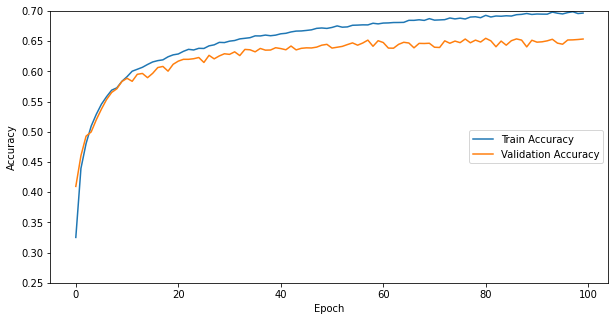

In [ ]:
#Accuracy-Baseline System
fig = plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.25, 0.7])
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='center right')

**Augmented Dataset**

In [ ]:
#Loading original cifar 10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# Normalize pixel values to be between 0 and 1 instead of -1 to 1 this time
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#Setting aside 5000 training examples as validation dataset
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42,shuffle=True)

In [ ]:
#First Augmented Dataset:Brighten by 10%
augmented_dataset1= np.minimum(train_images*1.1,1)
augmented_dataset1_label=train_labels

#Second Augmented Dataset:Darken by 10%
augmented_dataset2=train_images*0.9
augmented_dataset2_label=train_labels

#Third Augmented dataset: Flipping image horizontally
temp=train_images
augmented_dataset3=np.fliplr(temp)
augmented_dataset3_label=train_labels

#Fourth Augmented dataset: Original dataset
augmented_dataset4=train_images
augmented_dataset4_label=train_labels


In [ ]:
#Correcting the alignmenent of augmented dataset 3
temp=train_images
import cv2
for i in range(45000):
  flipr = cv2.flip(temp[i], 1)
  augmented_dataset3[i]=flipr


In [ ]:
# Some more tedious work
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42,shuffle=True)

augmented_dataset4=train_images
augmented_dataset4_label=train_labels

**Plotting for one of the training images for each of the 4 augmented datasets to check if augmentation worked well**

**Augmented dataset1: Brighten pixels by 10%**
**Augmented dataset 2:Darken pixels by 10%**
**Augmented dataset 3: flip images horizontally(mirror image)**
**Augmented dataset 4: Original dataset**

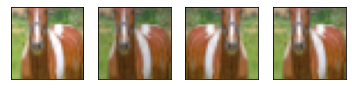

In [ ]:
i=100
f = plt.figure()
f.add_subplot(1,4, 1)
plt.imshow(augmented_dataset1[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

f.add_subplot(1,4, 2)
plt.imshow(augmented_dataset2[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
f.add_subplot(1,4, 3)
plt.imshow(augmented_dataset3[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
f.add_subplot(1,4, 4)
plt.imshow(augmented_dataset4[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show(block=True)

In [ ]:
#Stacking these augmented datasets into one big dataset
final_dataset=np.vstack((augmented_dataset1,augmented_dataset2,augmented_dataset3,augmented_dataset4))

In [ ]:
final_dataset.shape

(180000, 32, 32, 3)

In [ ]:
#Stacking their labels as well
final_labels=np.vstack((train_labels,train_labels,train_labels,train_labels))

In [ ]:
final_labels.shape

(180000, 10)

In [ ]:
val_images.shape

(5000, 32, 32, 3)

In [ ]:
val_labels.shape

(5000, 10)

In [ ]:
#Normalizing this combined dataset to values between -1 and 1
final_dataset, val_images = (final_dataset - 0.5)/0.5, (val_images - 0.5)/0.5

In [ ]:
np.min(final_dataset)

-1.0

In [ ]:
#Creating a model to fit this data
model1 = Sequential()
model1.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(32,32,3), strides=1))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2))
model1.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', strides=1))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2))
model1.add(Flatten())
model1.add(Dense(20, activation='relu', name='layer2', kernel_initializer= 'he_normal' ))
model1.add(Dense(10, activation='softmax', name='layer3', kernel_initializer = 'he_normal'))


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
layer2 (Dense)               (None, 20)                5020      
_________________________________________________________________
layer3 (Dense)               (None, 10)               

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(final_dataset, final_labels, epochs=100,batch_size=512, 
                    validation_data=(val_images, val_labels))

352/352 [==============================] - 2s 6ms/step - loss: 0.8433 - accuracy: 0.7074 - val_loss: 0.9814 - val_accuracy: 0.6622
Epoch 80/100
352/352 [==============================] - 2s 6ms/step - loss: 0.8386 - accuracy: 0.7093 - val_loss: 0.9788 - val_accuracy: 0.6658
Epoch 81/100
352/352 [==============================] - 2s 6ms/step - loss: 0.8386 - accuracy: 0.7095 - val_loss: 0.9629 - val_accuracy: 0.6684
Epoch 82/100
352/352 [==============================] - 2s 6ms/step - loss: 0.8384 - accuracy: 0.7091 - val_loss: 0.9605 - val_accuracy: 0.6710
Epoch 83/100
352/352 [==============================] - 2s 6ms/step - loss: 0.8374 - accuracy: 0.7096 - val_loss: 0.9686 - val_accuracy: 0.6652
Epoch 84/100
352/352 [==============================] - 2s 6ms/step - loss: 0.8366 - accuracy: 0.7092 - val_loss: 0.9896 - val_accuracy: 0.6654
Epoch 85/100
352/352 [==============================] - 2s 6ms/step - loss: 0.8349 - accuracy: 0.7110 - val_loss: 0.9754 - val_accuracy: 0.6658
Epoch

**Comparing the validation accuracy for this augmented dataset and baseline dataset. Same Model trained on augmented dataset performs much better than the one trained on baseline dataset**

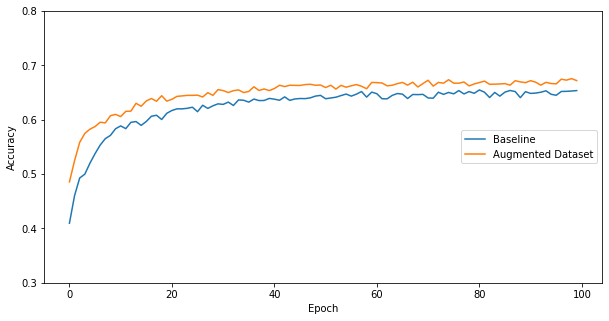

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(history1.history['val_accuracy'], label = 'Augmented Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.30, 0.8])
plt.legend(['Baseline', 'Augmented Dataset'], loc='center right')
#plt.legend(loc='lower right')



**Problem 4**

**Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Model
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

from keras.layers import Activation
from keras.layers import Dropout, Flatten
from keras.layers import  Conv1D,Conv2D, MaxPooling2D,MaxPooling1D
from keras.optimizers import SGD

In [2]:
#Importing the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**Setting Aside 50 examples per class=500 training examples** 

In [3]:
import random
a = list()   
b=list()
c=list()

for i in range(10):
  index = np.where(train_labels == i)[0]
  index=list(index)
  fin_index=random.sample(index, 50)
  
  temp_images=train_images[fin_index]
  temp_labels=train_labels[fin_index]
  
  
  a.append(temp_images)
  b.append(temp_labels)
  c.append(fin_index)

In [4]:
train_images_shortlist = np.vstack(a)
train_labels_shortlist=np.vstack(b)
print(train_images_shortlist.shape)
print(train_labels_shortlist.shape)

(500, 32, 32, 3)
(500, 1)


In [5]:
#Keeping the remaining training examples in train_images_remaining variable 
train_images_remaining = np.delete(train_images, c,0)
print(train_images_remaining.shape)

(49500, 32, 32, 3)


**Pretext Task**

In [6]:
#a) Setting label for class 0 as 0
zero_class = np.full((49500, 1), 0, dtype=np.int64)
zero_class_images=train_images_remaining

#b) Setting label for class 1 as 1
first_class=np.full((49500, 1), 1, dtype=np.int64)
first_class_images=np.flip(train_images_remaining, axis=1)

#c) Setting label for class 2 as 2
second_class=np.full((49500, 1), 2, dtype=np.int64)
second_class_images= np.rot90(train_images_remaining, axes=(1,2))

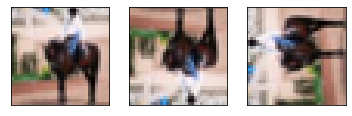

In [7]:
#Plotting one of the image for each of these augmented datasets-class 0: image as it is, class 1: image vertically flipped, class 2: image flipped 90 degree counter clockwise

f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(zero_class_images[11], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

f.add_subplot(1,3, 2)
plt.imshow(first_class_images[11], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
f.add_subplot(1,3, 3)
plt.imshow(second_class_images[11], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show(block=True)

**Creating the augmented dataset by stacking each of the 3 datasets**

In [8]:
pretext_dataset=np.vstack((zero_class_images,first_class_images,second_class_images))
pretext_labels=np.vstack((zero_class,first_class,second_class))

In [9]:
print(pretext_dataset.shape)
print(pretext_labels.shape)

(148500, 32, 32, 3)
(148500, 1)


In [10]:
# Normalize pixel values of augmented dataset to be between -1 and 1
final_dataset = pretext_dataset / 255.0
final_dataset = (final_dataset - 0.5)/0.5

In [12]:
print(final_dataset.shape)

#Converting labels to one hot encoding with 3 classes-0,1,2
final_labels = to_categorical(pretext_labels,3)

(148500, 32, 32, 3)


In [13]:
#Creating a sequential model to train using this augmented dataset
model_pretext = Sequential()
model_pretext.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(32,32,3), strides=1))
model_pretext.add(MaxPooling2D(pool_size=(2,2), strides=2))
model_pretext.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', strides=1))
model_pretext.add(MaxPooling2D(pool_size=(2,2), strides=2))
model_pretext.add(Flatten())
model_pretext.add(Dense(20, activation='relu', name='layer2', kernel_initializer= 'he_normal' ))
model_pretext.add(Dense(3, activation='softmax', name='layer3', kernel_initializer = 'he_normal'))

In [14]:
model_pretext.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
layer2 (Dense)               (None, 20)                5020      
_________________________________________________________________
layer3 (Dense)               (None, 3)                 6

In [15]:
model_pretext.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Fitting the model
history_pretext = model_pretext.fit(final_dataset, final_labels, epochs=100,batch_size=512,shuffle=True)

291/291 [==============================] - 2s 6ms/step - loss: 0.5281 - accuracy: 0.7776
Epoch 96/100
291/291 [==============================] - 2s 6ms/step - loss: 0.5283 - accuracy: 0.7776
Epoch 97/100
291/291 [==============================] - 2s 6ms/step - loss: 0.5274 - accuracy: 0.7791
Epoch 98/100
291/291 [==============================] - 2s 6ms/step - loss: 0.5278 - accuracy: 0.7783
Epoch 99/100
291/291 [==============================] - 2s 6ms/step - loss: 0.5269 - accuracy: 0.7781
Epoch 100/100
291/291 [==============================] - 2s 6ms/step - loss: 0.5269 - accuracy: 0.7789


**Next steps to save this pretext model**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/gdrive


In [52]:
import keras
from tensorflow.keras.models import load_model

In [15]:
model_pretext.save("/content/drive/My Drive/pretext_model.h5")

# It can be used to reconstruct the model identically.
#model_pretext = keras.models.load_model("/content/drive/My Drive/pretext_model.h5")

**Baseline Model**

**Using the 500 data points we separated for each class to train this baseline model**

In [16]:
#Images- Normalize pixel values to be between -1 and 1
baseline_dataset,baseline_dataset_test = train_images_shortlist / 255.0,test_images/255.0
baseline_dataset,baseline_dataset_test = (baseline_dataset - 0.5)/0.5,(baseline_dataset_test-0.5)/0.5
print(baseline_dataset.shape)
print(baseline_dataset_test.shape)

#Labels-One hot encoding
baseline_labels = to_categorical(train_labels_shortlist,10)
baseline_labels_test = to_categorical(test_labels,10)
print(baseline_labels.shape)
print(baseline_labels_test.shape)

(500, 32, 32, 3)
(10000, 32, 32, 3)
(500, 10)
(10000, 10)


In [17]:
#Creating a baseline model
model_baseline = Sequential()
model_baseline.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(32,32,3), strides=1,kernel_initializer="he_normal"))
model_baseline.add(MaxPooling2D(pool_size=(2,2), strides=2))
model_baseline.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', strides=1,kernel_initializer="he_normal"))
model_baseline.add(MaxPooling2D(pool_size=(2,2), strides=2))
model_baseline.add(Flatten())
model_baseline.add(Dense(20, activation='relu', name='layer2', kernel_initializer= 'he_normal' ))
model_baseline.add(Dense(10, activation='softmax', name='layer3', kernel_initializer = 'he_normal'))


In [18]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
layer2 (Dense)               (None, 20)                5020      
_________________________________________________________________
layer3 (Dense)               (None, 10)                2

In [19]:
model_baseline.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#Fitting this baseline model using cifar-10 test dataset as our validation data and validating it every 100 epochs
history_baseline = model_baseline.fit(baseline_dataset, baseline_labels,
                                      epochs=10000,validation_data=(baseline_dataset_test, baseline_labels_test),
                                      shuffle=True,verbose=1,validation_freq=100)

16/16 [==============================] - 0s 3ms/step - loss: 6.9141e-09 - accuracy: 1.0000
Epoch 9992/10000
16/16 [==============================] - 0s 3ms/step - loss: 6.6757e-09 - accuracy: 1.0000
Epoch 9993/10000
16/16 [==============================] - 0s 2ms/step - loss: 6.6757e-09 - accuracy: 1.0000
Epoch 9994/10000
16/16 [==============================] - 0s 3ms/step - loss: 6.6757e-09 - accuracy: 1.0000
Epoch 9995/10000
16/16 [==============================] - 0s 3ms/step - loss: 6.1989e-09 - accuracy: 1.0000
Epoch 9996/10000
16/16 [==============================] - 0s 3ms/step - loss: 5.7220e-09 - accuracy: 1.0000
Epoch 9997/10000
16/16 [==============================] - 0s 3ms/step - loss: 5.9605e-09 - accuracy: 1.0000
Epoch 9998/10000
16/16 [==============================] - 0s 3ms/step - loss: 5.9605e-09 - accuracy: 1.0000
Epoch 9999/10000
16/16 [==============================] - 0s 3ms/step - loss: 5.9605e-09 - accuracy: 1.0000
Epoch 10000/10000
16/16 [====================

In [55]:
#Saving this model
model_baseline.save("/content/drive/My Drive/baselinemodel.h5")

**Transfer Learning Task**

In [37]:
#Loading the trained Pretext model into model3. We will finetune the pretext model's weights as well to suit our classification task
model3 = Sequential()
for i in range(6):
    layer = model_pretext.layers[i]
    layer.trainable = True
    model3.add(layer)
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
layer2 (Dense)               (None, 20)                5020      
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
____________________________________________________

In [38]:
#Adding one hidden layer and an output layer to this pretrained model
model3.add(Dense(64, activation='relu', name='layer3', kernel_initializer = 'he_normal'))
model3.add(Dense(10, activation='softmax', name='output_layer', kernel_initializer = 'he_normal'))

In [39]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
layer2 (Dense)               (None, 20)                5020      
_________________________________________________________________
layer3 (Dense)               (None, 64)               

In [ ]:
#!pip install keras-lr-multiplier
#from keras_lr_multiplier import LRMultiplier


In [42]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
print(baseline_dataset.shape)
print(baseline_labels.shape)

(500, 32, 32, 3)
(500, 10)


In [44]:
print(baseline_dataset_test.shape)
print(baseline_labels_test.shape)

(10000, 32, 32, 3)
(10000, 10)


In [45]:
#Training this new transfer learning model with low learning rate as pre-trained weights would already be mostly trained. So we need to set the learning rate to be a bit small
history_model3=model3.fit(baseline_dataset,baseline_labels,epochs=10000,
                          validation_data=(baseline_dataset_test, baseline_labels_test),
                          shuffle=True,validation_freq=100)

16/16 [==============================] - 0s 3ms/step - loss: 2.4080e-08 - accuracy: 1.0000
Epoch 9994/10000
16/16 [==============================] - 0s 3ms/step - loss: 2.3127e-08 - accuracy: 1.0000
Epoch 9995/10000
16/16 [==============================] - 0s 3ms/step - loss: 2.3603e-08 - accuracy: 1.0000
Epoch 9996/10000
16/16 [==============================] - 0s 3ms/step - loss: 2.1696e-08 - accuracy: 1.0000
Epoch 9997/10000
16/16 [==============================] - 0s 3ms/step - loss: 2.4080e-08 - accuracy: 1.0000
Epoch 9998/10000
16/16 [==============================] - 0s 3ms/step - loss: 2.2888e-08 - accuracy: 1.0000
Epoch 9999/10000
16/16 [==============================] - 0s 3ms/step - loss: 2.4796e-08 - accuracy: 1.0000
Epoch 10000/10000
16/16 [==============================] - 1s 43ms/step - loss: 2.2888e-08 - accuracy: 1.0000 - val_loss: 18.7260 - val_accuracy: 0.3396


In [54]:
#Saving the model
model3.save("/content/drive/My Drive/transferlearning.h5")

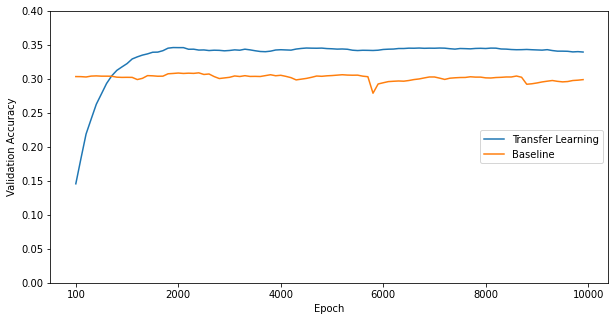

In [63]:
fig = plt.figure(figsize=(10,5))
plt.plot(history_model3.history['val_accuracy'], label='Transfer Learning')
plt.plot(history_baseline.history['val_accuracy'], label = 'Baseline')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(np.arange(0, 120, step=20),labels=(100,2000,4000,6000,8000,10000))
plt.ylim([0, 0.4])
plt.legend(['Transfer Learning', 'Baseline'], loc='center right')
#plt.legend(loc='lower right')

